In [3]:
!pip install wordcloud

In [1]:
# Calling necessary libraries for visualization

from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('bw_project_cleaned.csv')
data

,Author,Quote,Tag_Names
0,Albert Einstein,The world as we have created it is a process o...,"change,deep-thoughts,thinking,world"
1,J.K. Rowling,"It is our choices, Harry, that show what we tr...","abilities,choices"
2,Albert Einstein,There are only two ways to live your life. One...,"inspirational,life,live,miracle,miracles"
3,Jane Austen,"The person, be it gentleman or lady, who has n...","aliteracy,books,classic,humor"
4,Marilyn Monroe,"Imperfection is beauty, madness is genius and ...","be-yourself,inspirational"
...,...,...,...
95,Harper Lee,You never really understand a person until you...,better-life-empathy
96,Madeleine L'Engle,You have to write the book that wants to be wr...,"books,children,difficult,grown-ups,write,write..."
97,Mark Twain,Never tell the truth to people who are not wor...,truth
98,Dr. Seuss,"A person's a person, no matter how small.”",inspirational


## Data VIsualization

### Bar chart of the top 10 most quoted authors

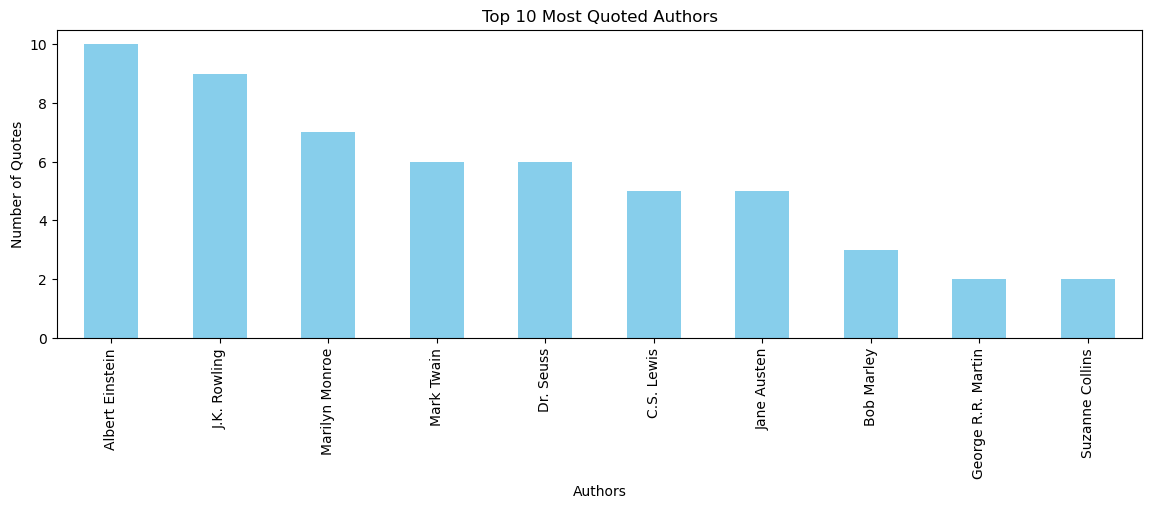

In [7]:
no_ofQuotes = data.groupby(['Author'])['Quote'].count()
sort= no_ofQuotes.sort_values(ascending= False)
sort_ten = sort.head(10)


# Bar plot with pandas
plt.figure(figsize=(14,4))
sort_ten.plot(kind= 'bar', color='skyblue')
plt.ylabel("Number of Quotes")
plt.xlabel("Authors")
plt.title("Top 10 Most Quoted Authors")
plt.show()

### Word cloud of the most common words in the quotes.

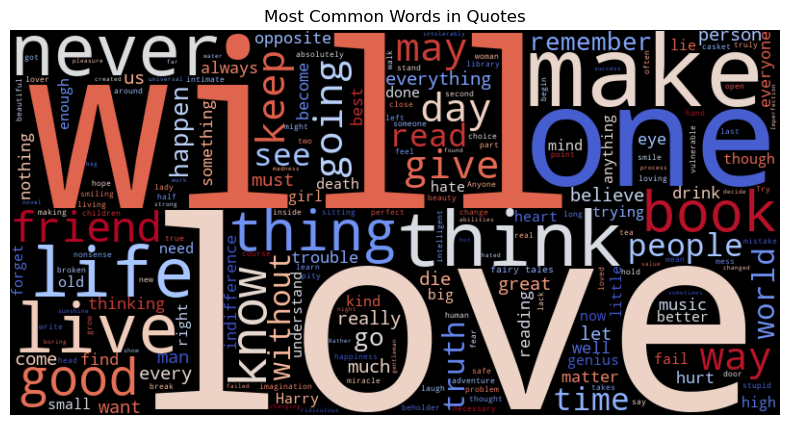

In [10]:
quotes=data['Quote']
text = " ".join(quotes)
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='coolwarm').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Quotes")
plt.show()

### Pie chart showing the proportion of top 5 tags

In [13]:
all_tags = data["Tag_Names"].str.split(",")
tag_counts = pd.Series([tag.strip() for tags in all_tags for tag in tags]).value_counts()
top_5 = tag_counts.head(5)

# Making a 1d array to collect rest of tag names
others = pd.Series({'Others': tag_counts[5:].sum()})

# Combine into one series
final_counts = pd.concat([top_5, others])
final_counts

love              14
inspirational     13
life              13
humor             12
books             11
Others           172
dtype: int64

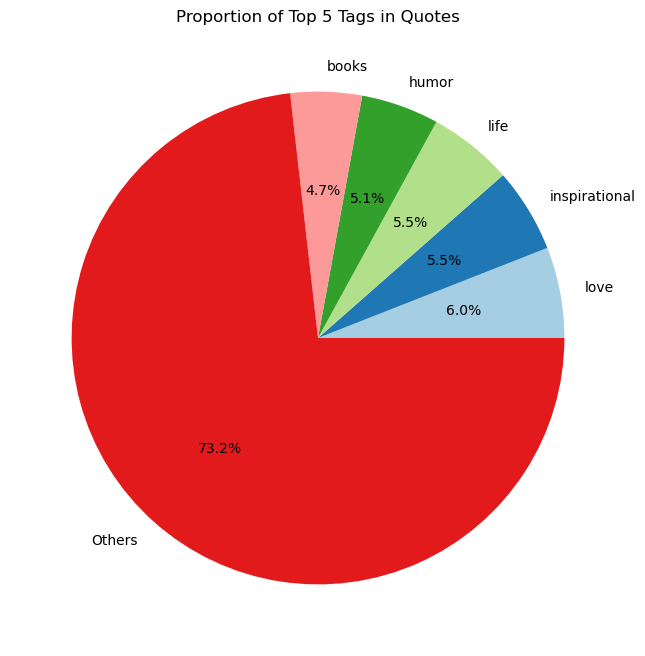

In [15]:
plt.figure(figsize=(8, 8))
plt.pie( final_counts, labels = ['love', 'inspirational', 'life','humor','books', 'Others'], autopct='%1.1f%%', colors=plt.cm.Paired.colors)

plt.title("Proportion of Top 5 Tags in Quotes")
plt.show()